In [1]:
import pandas as pd
dailySteps=pd.read_csv(r"C:\Users\ankit\Desktop\Google DA Certificate\Bellabeat Case Study\Bellabeat Dataset\Fitabase Data 4.12.16-5.12.16\dailySteps_merged.csv")

In [2]:
dailySteps.head

<bound method NDFrame.head of              Id ActivityDay  StepTotal
0    1503960366   4/12/2016      13162
1    1503960366   4/13/2016      10735
2    1503960366   4/14/2016      10460
3    1503960366   4/15/2016       9762
4    1503960366   4/16/2016      12669
..          ...         ...        ...
935  8877689391    5/8/2016      10686
936  8877689391    5/9/2016      20226
937  8877689391   5/10/2016      10733
938  8877689391   5/11/2016      21420
939  8877689391   5/12/2016       8064

[940 rows x 3 columns]>

In [10]:
#converting "ActivityDay" to datetime type
dailySteps['ActivityDay']= pd.to_datetime(dailySteps['ActivityDay'])
#Adding the Day column using dt
dailySteps['DayName']=dailySteps['ActivityDay'].dt.day_name()


In [12]:
del dailySteps['Day']

In [13]:
dailySteps.head

<bound method NDFrame.head of              Id ActivityDay  StepTotal    DayName
0    1503960366  2016-04-12      13162    Tuesday
1    1503960366  2016-04-13      10735  Wednesday
2    1503960366  2016-04-14      10460   Thursday
3    1503960366  2016-04-15       9762     Friday
4    1503960366  2016-04-16      12669   Saturday
..          ...         ...        ...        ...
935  8877689391  2016-05-08      10686     Sunday
936  8877689391  2016-05-09      20226     Monday
937  8877689391  2016-05-10      10733    Tuesday
938  8877689391  2016-05-11      21420  Wednesday
939  8877689391  2016-05-12       8064   Thursday

[940 rows x 4 columns]>

In [19]:
#Grouby
steps_per_day = dailySteps.groupby('DayName')['StepTotal'].sum().reset_index()
# Sort days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
steps_per_day['DayName'] = pd.Categorical(steps_per_day['DayName'], categories=days_of_week, ordered=True)

# Sort the DataFrame by DayName
steps_per_day = steps_per_day.sort_values('DayName')

In [20]:
print(steps_per_day)

     DayName  StepTotal
1     Monday     933704
5    Tuesday    1235001
6  Wednesday    1133906
4   Thursday    1088658
0     Friday     938477
2   Saturday    1010969
3     Sunday     838921


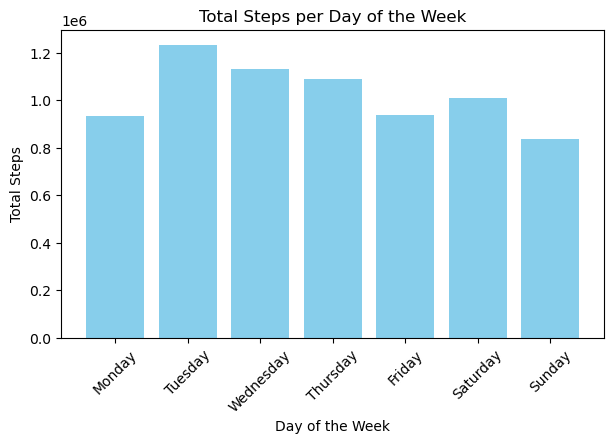

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
plt.bar(steps_per_day['DayName'], steps_per_day['StepTotal'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Steps')
plt.title('Total Steps per Day of the Week')
plt.xticks(rotation=45)
plt.show()